<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/Deep_Learning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comprehensive Assessment : Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks

Objective:
You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.


.Loading and Preprocessing (4 marks)
Load the Diabetes dataset from sklearn.
Handle any missing values if present.
Normalize the features to ensure better performance of the ANN model.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()


data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add target variable
print(data.head())  # View the first few rows


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np


diabetes = load_diabetes()

data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target variable

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

 Handle Missing Values


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")


if missing_values.any():

    data.fillna(data.mean(), inplace=True)


Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


 Normalize the Features

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = data.drop(columns='target')
y = data['target']

# Initialize the scaler
scaler = MinMaxScaler()


X_normalized = scaler.fit_transform(X)


X_normalized = pd.DataFrame(X_normalized, columns=diabetes.feature_names)

print(X_normalized.head())


        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  
0  0.562217  0.439394  
1  0.222437  0.166667  
2  0.496578  0.409091  
3  0.572923  0.469697  
4  0.362385  0.333333  


Exploratory Data Analysis (EDA) (4 marks)
Perform EDA to understand the distribution of features and the target variable.
Visualize the relationships between features and the target variable.

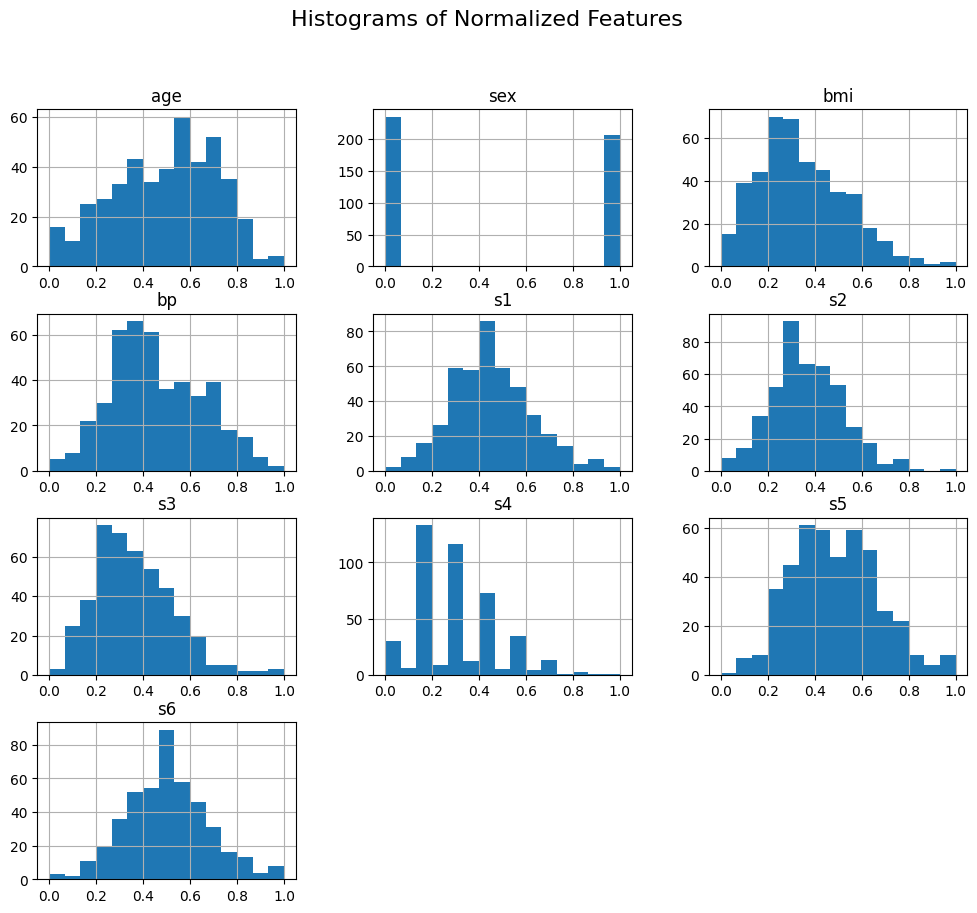

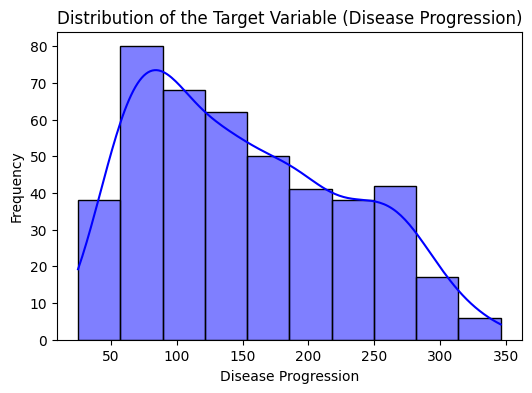

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


X_normalized.hist(figsize=(12, 10), bins=15)
plt.suptitle("Histograms of Normalized Features", fontsize=16)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data['target'], kde=True, color='blue')
plt.title('Distribution of the Target Variable (Disease Progression)')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()


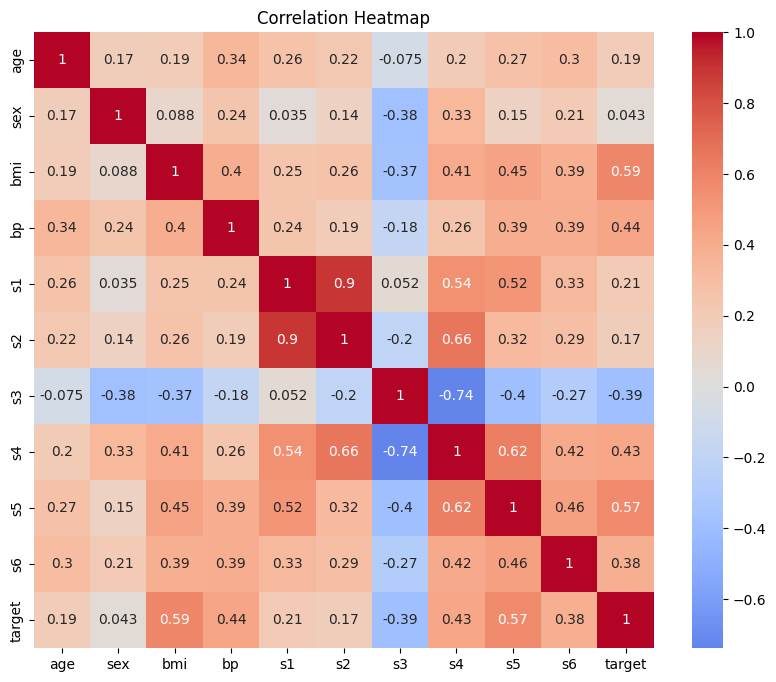

In [6]:
# Create a correlation matrix
corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


Pairplot to Visualize Relationships Between Features and Target

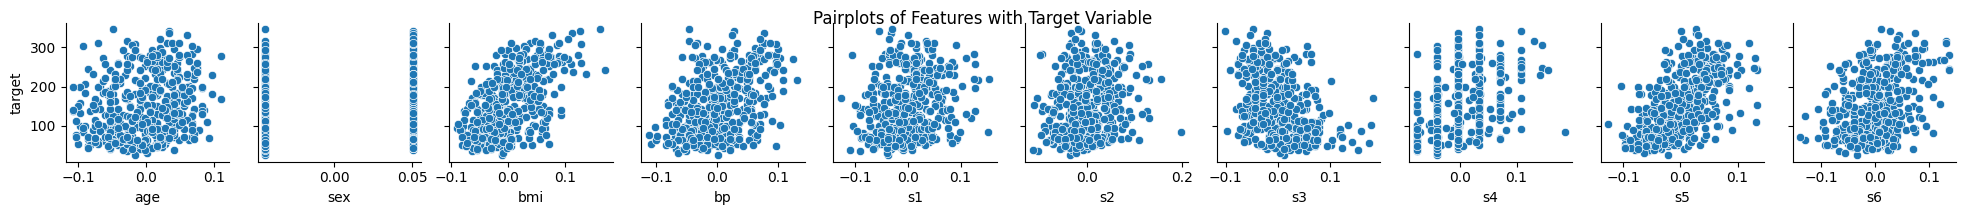

In [7]:
# Use pairplot to see feature-target relationships
sns.pairplot(data, y_vars='target', x_vars=data.columns[:-1], height=2, aspect=1)
plt.suptitle('Pairplots of Features with Target Variable', y=1.02)
plt.show()


Building the ANN Model
Design a simple ANN architecture with at least one hidden layer.
Use appropriate activation functions .

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [10]:
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Define the ANN model
model = Sequential()

# Input layer and hidden layer with ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons

model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

Training the ANN Model

In [12]:
# Fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 32025.7480 - mae: 160.5766 - val_loss: 26217.0840 - val_mae: 144.6942
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28157.0078 - mae: 148.8958 - val_loss: 25679.0449 - val_mae: 142.9115
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27189.8242 - mae: 145.7357 - val_loss: 24529.6074 - val_mae: 139.0341
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27025.9062 - mae: 145.4538 - val_loss: 22379.8145 - val_mae: 131.4831
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23454.1602 - mae: 131.8814 - val_loss: 19152.3320 - val_mae: 119.2545
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19536.3223 - mae: 119.0501 - val_loss: 15025.0420 - val_mae: 101.6207
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16804.2715 - mae: 106.1504 - val_loss: 10559.2734 - val_mae: 79.2381
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10109.8936 - mae: 77.0900 - val_loss: 

Evaluate the Model Performance

In [13]:
# Evaluate on the test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error: {mae}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3044.6040 - mae: 45.0318 
Test Loss: 2869.68115234375
Test Mean Absolute Error: 43.62150955200195


mproving the Model

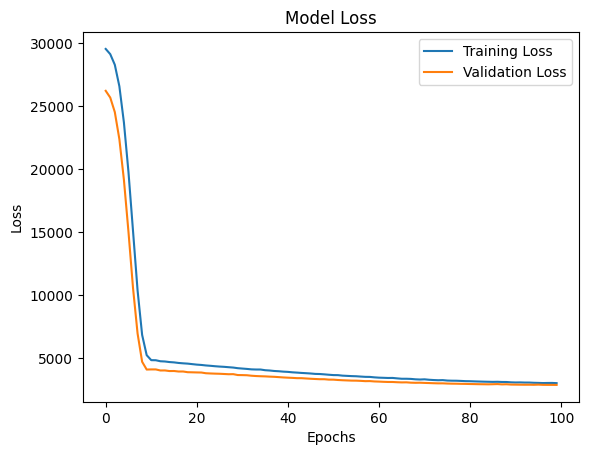

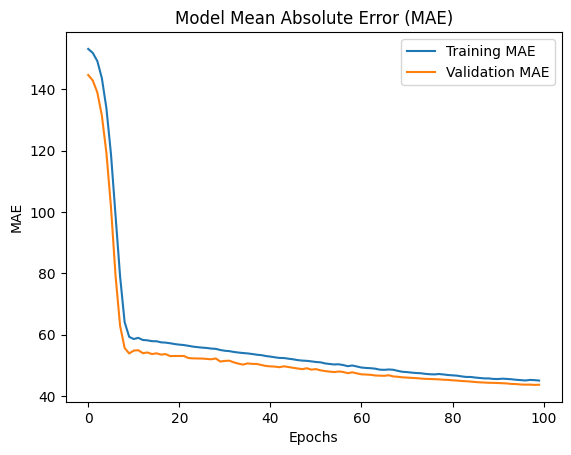

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE over epochs
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
